## Imports

In [1]:
from keras.layers import Dense
from tensorflow.keras import regularizers
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import scipy.sparse 
from matplotlib import pyplot as plt

## Loading Data

### ClinicalBERT Pooled Embeddings

In [2]:
embeddings = np.load('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_ClinicalBERT_pooled_embeddings_68k.npy')
labels = np.load('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_ClinicalBERT_pooled_labels_68k.npy')


In [3]:
train_X, test_X, train_y, test_y = train_test_split(embeddings, labels, test_size=0.20, random_state=42, stratify=labels)
del embeddings
del labels

In [4]:
train_X.shape

(54200, 768)

In [33]:
test_X.shape

(13550, 768)

## Define Keras Model

In [35]:
inputs = tf.keras.layers.Input(shape=(train_X.shape[1],))
classification_out = tf.keras.layers.Dense(4, activation='softmax')(inputs)

model_functional = tf.keras.models.Model(inputs=inputs, outputs = classification_out)
model_functional.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])


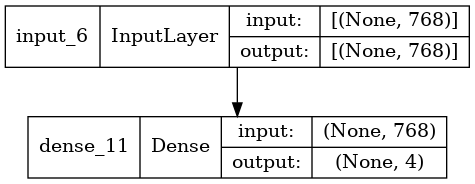

In [36]:
tf.keras.utils.plot_model(model_functional, show_shapes = True)


In [37]:
train = model_functional.fit(train_X, train_y, epochs=50, validation_split=0.2)


Epoch 1/50
1355/1355 [==============================] - 3s 2ms/step - loss: 1.4138 - sparse_categorical_accuracy: 0.2489 - val_loss: 1.4278 - val_sparse_categorical_accuracy: 0.2504
Epoch 2/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4156 - sparse_categorical_accuracy: 0.2531 - val_loss: 1.4013 - val_sparse_categorical_accuracy: 0.2494
Epoch 3/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4121 - sparse_categorical_accuracy: 0.2538 - val_loss: 1.4033 - val_sparse_categorical_accuracy: 0.2527
Epoch 4/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4118 - sparse_categorical_accuracy: 0.2555 - val_loss: 1.4133 - val_sparse_categorical_accuracy: 0.2478
Epoch 5/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4124 - sparse_categorical_accuracy: 0.2538 - val_loss: 1.4193 - val_sparse_categorical_accuracy: 0.2482
Epoch 6/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4150 - spars

Epoch 46/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4048 - sparse_categorical_accuracy: 0.2643 - val_loss: 1.4484 - val_sparse_categorical_accuracy: 0.2552
Epoch 47/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4048 - sparse_categorical_accuracy: 0.2647 - val_loss: 1.4105 - val_sparse_categorical_accuracy: 0.2482
Epoch 48/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4054 - sparse_categorical_accuracy: 0.2667 - val_loss: 1.4688 - val_sparse_categorical_accuracy: 0.2482
Epoch 49/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4057 - sparse_categorical_accuracy: 0.2670 - val_loss: 1.4046 - val_sparse_categorical_accuracy: 0.2474
Epoch 50/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4054 - sparse_categorical_accuracy: 0.2671 - val_loss: 1.3956 - val_sparse_categorical_accuracy: 0.2530


In [38]:
test = model_functional.evaluate(test_X, test_y)


424/424 [==============================] - 0s 1ms/step - loss: 1.3947 - sparse_categorical_accuracy: 0.2545


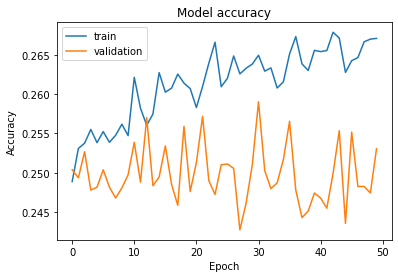

In [39]:
plt.plot(train.history['sparse_categorical_accuracy'])
plt.plot(train.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Hardly any learning at all, very unstable. Might need to increase learning rate.

---

In [42]:
inputs = tf.keras.layers.Input(shape=(train_X.shape[1],))
classification_out = tf.keras.layers.Dense(4, activation='softmax')(inputs)

model_functional = tf.keras.models.Model(inputs=inputs, outputs = classification_out)
model_functional.compile(loss='SparseCategoricalCrossentropy', 
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), 
                         metrics=['sparse_categorical_accuracy'])


In [43]:
train = model_functional.fit(train_X, train_y, epochs=50, validation_split=0.2)


Epoch 1/50
1355/1355 [==============================] - 3s 2ms/step - loss: 5.5792 - sparse_categorical_accuracy: 0.2532 - val_loss: 3.7491 - val_sparse_categorical_accuracy: 0.2475
Epoch 2/50
1355/1355 [==============================] - 2s 2ms/step - loss: 5.4696 - sparse_categorical_accuracy: 0.2512 - val_loss: 6.1171 - val_sparse_categorical_accuracy: 0.2478
Epoch 3/50
1355/1355 [==============================] - 2s 2ms/step - loss: 5.1476 - sparse_categorical_accuracy: 0.2507 - val_loss: 4.0260 - val_sparse_categorical_accuracy: 0.2494
Epoch 4/50
1355/1355 [==============================] - 2s 2ms/step - loss: 5.3316 - sparse_categorical_accuracy: 0.2499 - val_loss: 8.2159 - val_sparse_categorical_accuracy: 0.2552
Epoch 5/50
1355/1355 [==============================] - 2s 2ms/step - loss: 5.2628 - sparse_categorical_accuracy: 0.2529 - val_loss: 2.6143 - val_sparse_categorical_accuracy: 0.2528
Epoch 6/50
1355/1355 [==============================] - 2s 2ms/step - loss: 5.1338 - spars

Epoch 46/50
1355/1355 [==============================] - 2s 2ms/step - loss: 5.2477 - sparse_categorical_accuracy: 0.2568 - val_loss: 4.3751 - val_sparse_categorical_accuracy: 0.2481
Epoch 47/50
1355/1355 [==============================] - 2s 2ms/step - loss: 5.4744 - sparse_categorical_accuracy: 0.2604 - val_loss: 3.0971 - val_sparse_categorical_accuracy: 0.2449
Epoch 48/50
1355/1355 [==============================] - 2s 2ms/step - loss: 5.3249 - sparse_categorical_accuracy: 0.2570 - val_loss: 4.1140 - val_sparse_categorical_accuracy: 0.2460
Epoch 49/50
1355/1355 [==============================] - 2s 2ms/step - loss: 5.6557 - sparse_categorical_accuracy: 0.2561 - val_loss: 4.7217 - val_sparse_categorical_accuracy: 0.2484
Epoch 50/50
1355/1355 [==============================] - 2s 2ms/step - loss: 5.1880 - sparse_categorical_accuracy: 0.2546 - val_loss: 6.0401 - val_sparse_categorical_accuracy: 0.2491


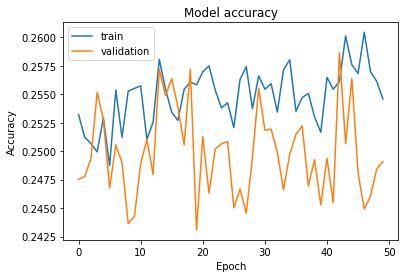

In [44]:
plt.plot(train.history['sparse_categorical_accuracy'])
plt.plot(train.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [45]:
test = model_functional.evaluate(test_X, test_y)


424/424 [==============================] - 0s 1ms/step - loss: 6.0059 - sparse_categorical_accuracy: 0.2476
